In [1]:
# Global toolbox
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

In [2]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbols = ['NVDA', 'AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
stocks= yf.download(stock_symbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


NVDA:
Mean: 31.73
Variance: 878.66
Skewness: 1.88
Kurtosis: 5.77
AMD:
Mean: 100.65
Variance: 1238.74
Skewness: 0.67
Kurtosis: 2.93
INTC:
Mean: 41.4
Variance: 97.47
Skewness: -0.17
Kurtosis: 1.97
QCOM:
Mean: 126.97
Variance: 935.47
Skewness: 0.31
Kurtosis: 3.42
AAPL:
Mean: 146.76
Variance: 1399.18
Skewness: -0.34
Kurtosis: 2.84
AVGO:
Mean: 63.06
Variance: 1312.74
Skewness: 1.34
Kurtosis: 3.96


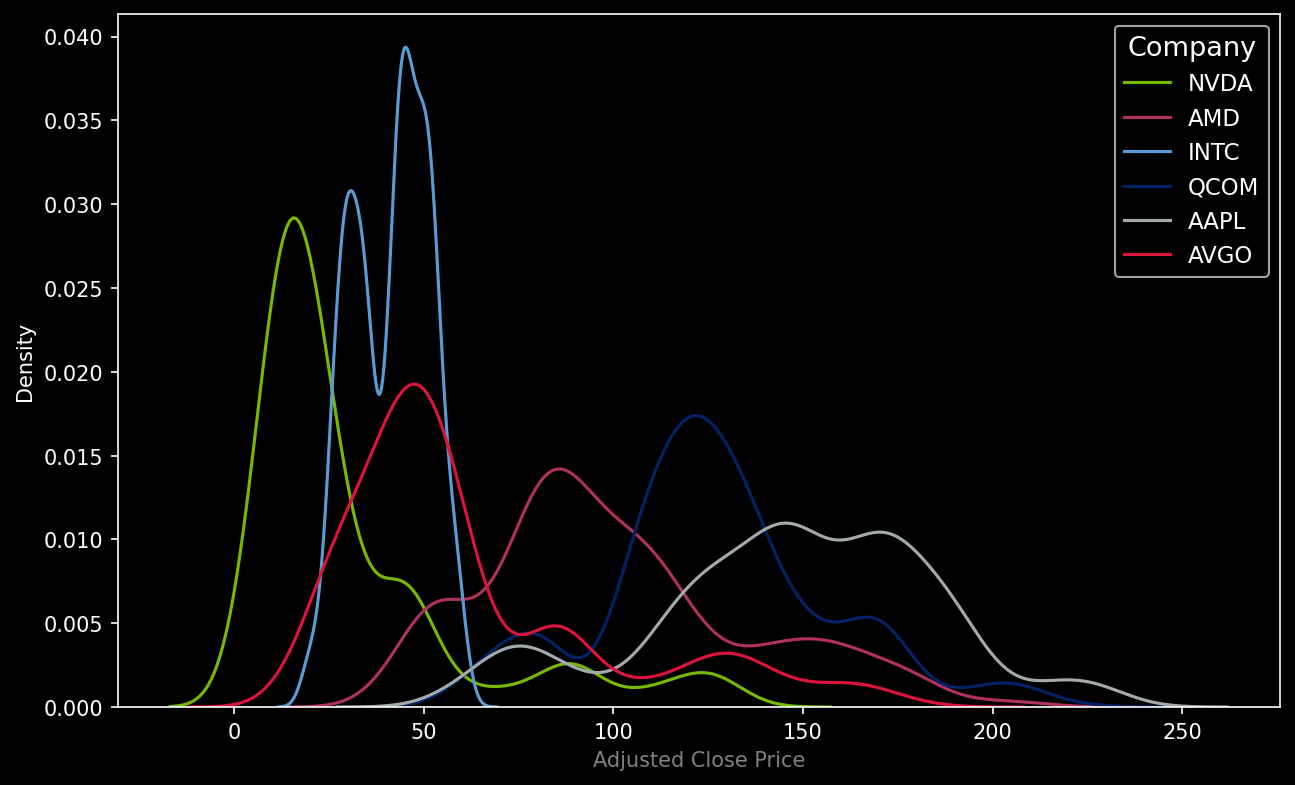

In [3]:
results = pd.DataFrame(columns=['Company', 'Mean', 'Variance', 'Skewness', 'Kurtosis'])
color = ['#76B900', '#B03060', '#5A9BD5', '#002366', '#A2AAAD', '#DC143C']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
for i in range(len(stock_symbols)): 
    X = stocks[stock_symbols[i]].dropna().values
    mean = round(np.mean(X), 2)
    variance = round(np.var(X), 2)
    skewness = round(ss.skew(X, axis=0, bias=True), 2)
    kurtosis = round(ss.kurtosis(X, axis=0, bias=True) + 3, 2) 
    
    print(f"{stock_symbols[i]}:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
 
    sns.kdeplot(data=X, linewidth=1.5, label=stock_symbols[i], color=color[i])  

#ax.set_title("Empirical Distributions of Adjusted Close Prices (Jan 2020 - Aug 2024)", color='white')
ax.set_xlabel("Adjusted Close Price", color='grey')  
ax.set_ylabel("Density", color='white')
ax.legend(title="Company", title_fontsize='13', fontsize='11')  



In [4]:
for symbol in stock_symbols:
     X = stocks[symbol].values
     # Bootstrap parameters
     T= X.shape[0]
     B = 1000 # how many times the resampling process is repeated

     # using round() instead of int() casting to reduce conversion error
     upper_bound = round(B * 0.975)
     lower_bound = round(B * 0.025)
     mu_boot = np.zeros(B) # mean in each resampling
     se_boot = np.zeros(B) # standard error in each resampling
     x_boot_std = np.zeros(B) # standard deviation in each resampling

    # Bootstrap
     for i in range(0, B):
          x_boot = X[np.random.choice(T,T)] # resampling with replacement, generating a new sample of size T
          mu_boot[i] = np.mean(x_boot) # the mean of the current bootstrap sample
          se_boot[i] = np.std(x_boot)/np.sqrt(T) # standard error of the mean, se = std/sqrt(T) = std/T^0.5, T here is the size, not transpose
          x_boot_std[i] = np.std(x_boot) # standard deviation of the current bootstrap sample
          # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
     mu_boot = np.sort(mu_boot)
     se_boot = np.sort(se_boot)
     xboot_std = np.sort(x_boot_std)
    
     """
     Method 1 takes the bootstrapped standard errors and rescales them by sqrt(T) to estimate the standard deviation.
     Method 2 directly works with the bootstrapped standard deviations. They give the same result because the two methods are mathematically related through the formula SE = SD\sqrt(T).

     In this context, T is the number of observations in our dataset, i.e., the length of X and not transpose
     """

     print(symbol)
     print("Mean: (",mu_boot[25],",", mu_boot[975],")")
     print("Standard Error: (",se_boot[25],",", se_boot[975],")")
     print("Standard Deviation(Method 1): (",se_boot[25]*np.sqrt(T),",", se_boot[975]*np.sqrt(T),")")
     print("Standard Deviation(Method 2):(",xboot_std[25],",", xboot_std[975],")")

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\56111\AppData\Local\Temp\ipykernel_309584\3708854787.py:25: SyntaxWarning: invalid escape sequence '\s'
  """


NVDA
Mean: ( 30.129750681085927 , 33.46072853525412 )
Standard Error: ( 0.8114400194888224 , 0.919467602649265 )
Standard Deviation(Method 1): ( 27.802923924251136 , 31.50434683191421 )
Standard Deviation(Method 2):( 27.802923924251136 , 31.50434683191421 )
AMD
Mean: ( 98.69462508765355 , 102.56773429428698 )
Standard Error: ( 0.9851455324059742 , 1.0667427148793849 )
Standard Deviation(Method 1): ( 33.75471462333573 , 36.550534649775436 )
Standard Deviation(Method 2):( 33.75471462333573 , 36.550534649775436 )
INTC
Mean: ( 40.83573942493133 , 41.96998352167757 )
Standard Error: ( 0.27969169476702355 , 0.29648421016005166 )
Standard Deviation(Method 1): ( 9.583267678553957 , 10.158641109437111 )
Standard Deviation(Method 2):( 9.583267678553957 , 10.158641109437111 )
QCOM
Mean: ( 125.34399403014825 , 128.58836461900648 )
Standard Error: ( 0.8493547599152603 , 0.930917301296194 )
Standard Deviation(Method 1): ( 29.10202258634085 , 31.896655681355362 )
Standard Deviation(Method 2):( 29.102